# <div style="text-align: center; margin-top:2em; margin-bottom:1em">ESTADÍSTICA PARA INGENIERÍA Y CIENCIAS</div>
## <div style="text-align: center; margin-bottom:1em">PRÁCTICA 1: Simulación</div>
## <div style="text-align: center; margin-bottom:1em">Ivan Svetlich</div>

***
<br></br>

In [4]:
#Librerias
library(IRdisplay)
library(ggplot2)

### **Ejercicio 1**

#### <div style="text-align: justify">El vendedor A distribuye partes, donde cada una tiene una probabilidad de 0.03 de estar defectuosa. El vendedor B también distribuye partes y cada parte tiene una probabilidad de 0.05 de estar defectuosa. Usted recibe un envío de 100 partes de cada vendedor.</div>

#### <br /><div style="text-align: justify">a) Sea X el número de partes defectuosas en el envío proveniente del vendedor A e Y el número de partes defectuosas en el envío proveniente del vendedor B. ¿Cuáles son las distribuciones de X e Y?</div>

<div style="text-align: justify">X e Y tienen distribución binomial con parámetros $n=100$, y $p_x=0.03$ y $p_y=0.05$ respectivamente:</div>

<div style="text-align: center">$X \sim B\left(100, 0.03\right)$&emsp;&emsp;$Y \sim B\left(100, 0.05\right)$</div>

#### <br /><div style="text-align: justify">b) Genere muestras simuladas de tamaño 1000 a partir de las distribuciones de X e Y.</div>

In [10]:
m <- 1000
n <- 100
px <- 0.03
py <- 0.05
X <- rbinom(m, n, px)
Y <- rbinom(m, n, py)

#### <br /><div style="text-align: justify">c) Utilice las muestras para estimar la probabilidad de que el número total de partes defectuosas sea menor a 10.</div>

In [11]:
total <- X + Y
P1 <- sum(total < 10) / length(total)
display_markdown(paste("$P(X + Y < 10) =$", P1))

$P(X + Y < 10) =$ 0.746

#### <br /><div style="text-align: justify">d) Utilice las muestras para estimar la probabilidad de que el envío del vendedor A tiene más partes defectuosas que el envío del vendedor B.</div>

In [12]:
P2 <- sum(X > Y) / length(X)
display_markdown(paste("$P(X > Y) =$", P2))

$P(X > Y) =$ 0.179

#### <br /><div style="text-align: justify">e) Construya una gráfica de probabilidad normal para el número total de partes defectuosas.</div>

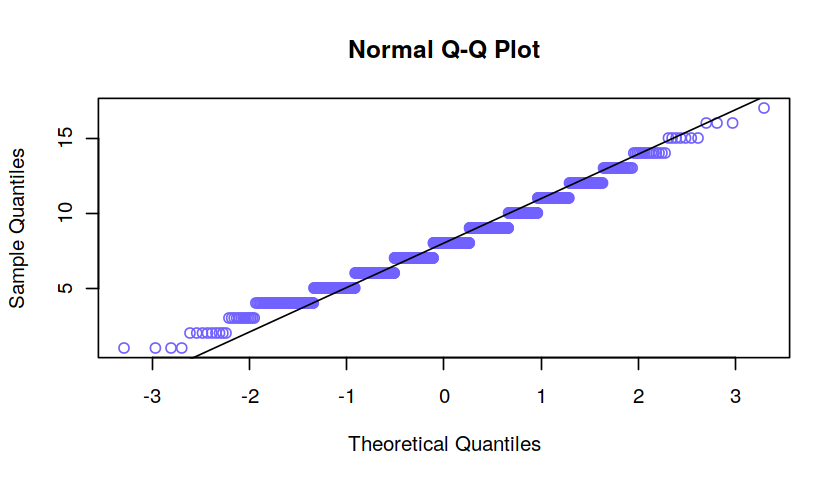

In [23]:
options(repr.plot.width=7, repr.plot.height=4)
qqnorm(total, col="#7161ff")
qqline(total, col="black")

<div style="text-align: justify">La forma particular de la gráfica de probabilidad normal se debe a que los datos provienen de distribuciones binomiales, y por lo tanto los cuantiles solo toman valores discretos.</div>

In [187]:
# Gráfico Proporción de partes defectuosas vs. distribución binomial teórica

# Obtengo las frecuencias
rango <- range(total)
df_sample <- data.frame(table(factor(total, levels = rango[1]:rango[2])))
colnames(df_sample) <- c("total", "freq")

# Calculo los valores teóricos de la binomial estimando el parámetro p
p_star <- sum(total) / (m*n)
x_binom <- rango[1]:rango[2]
y_binom <- dbinom(x_binom, n, p_star)

# Uno los valores simulados y los teóricos en un mismo dataframe 
A <- data.frame(x=df_sample$total, y=df_sample$freq / m)
B <- data.frame(x=x_binom, y=round(y_binom, 3))
df <- rbind(A,B)
df$dataset <- c(rep("A", nrow(A)), rep("B", nrow(B)))

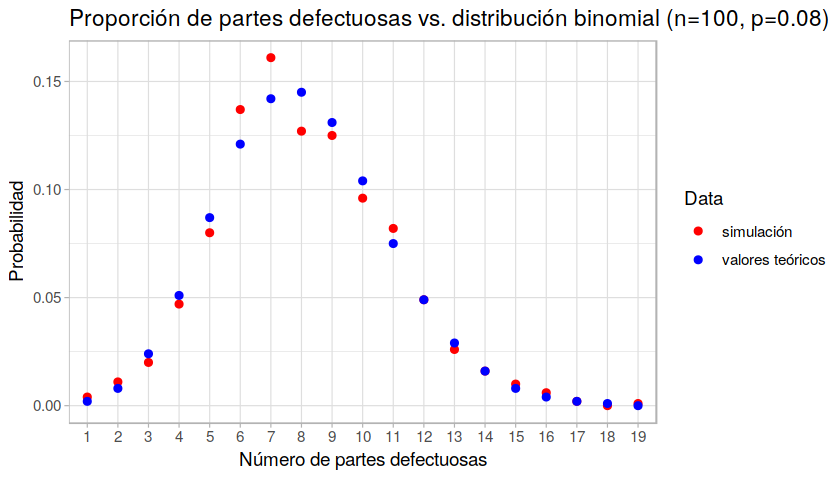

In [189]:
options(repr.plot.width=7, repr.plot.height=4)
ggplot(df, aes(x=df$x, y=df$y, col=dataset)) +
ggtitle(sprintf("Proporción de partes defectuosas vs. distribución binomial (n=%d, p=%.2f)", n, p_star)) +
geom_point() +
scale_color_manual(name="Data", labels = c("simulación","valores teóricos"), values=c("red", "blue")) +
xlab("Número de partes defectuosas") +
ylab("Probabilidad") + 
theme_light()

<div style="text-align: justify">La distribucón del número total de partes defectuosas obtenida mediante simulación parece corresponder a una Binomial con parámetros $n = 100$ y $p = 0.08$.</div>

***
<br></br>

### **Ejercicio 2**

#### <div style="text-align: justify">Dos diseños de cierto circuito de semiconductores están compitiendo entre sí. La duración del primero, en horas, se distribuye exponencialmente con $\lambda = 10^{-4}$ , y la duración del segundo tiene una distribución lognormal con $\mu = 6$ y ${\sigma}^2 = 5.4$.</div>

#### <br /><div style="text-align: justify">a) Utilice una muestra simulada de tamaño 1000 para estimar la probabilidad de que un circuito con el primer diseño dure más que otro con el segundo diseño.</div>

In [6]:
n <- 1000
lambda <- 1e-4
u <- 6
s <- sqrt(5.4)
X <- rexp(n, lambda)
Y <- rlnorm(n, u, s)
P1 <- sum(X > Y) / n
display_markdown(paste("$P(X > Y) =$", P1))

$P(X > Y) =$ 0.846

#### <br /><div style="text-align: justify">b) Utilice una muestra simulada de tamaño 1000 para estimar la probabilidad de que un circuito con el primer diseño dure el doble de tiempo que otro con el segundo diseño.</div>

In [7]:
P2 <- sum(X > 2*Y) / n
display_markdown(paste("$P(X > 2Y) =$", P2))

$P(X > 2Y) =$ 0.783

***
<br></br>

### **Ejercicio 3**

#### <div style="text-align: justify">Un cable está compuesto por cuatro alambres. La fuerza de ruptura de cada alambre es una variable aleatoria distribuida normalmente con media de 10 kN y desviación estándar de 1 kN. Utilizando el método del cable quebradizo, se estima que la fuerza del cable es igual a la fuerza del alambre más frágil multiplicada por el número de alambres.</div>

#### <br /><div style="text-align: justify">a) Utilice muestras simuladas de tamaño 1000 para estimar la fuerza media de este tipo de cable.</div>

In [8]:
m <- 4 # cantidad de cables
n <- 1000 # numero de muestras
u <- 10 # media poblacional
s <- 1 # desviacion standard
X <- rnorm(m*n, u, s)
data <- matrix(X, nrow = m)
Y <- apply(data, 2, min) * 4 # fuerza
Y_avg <- mean(Y) # fuerza media
display_markdown(paste("$\\overline{Y}^* =$", Y_avg))

$\overline{Y}^* =$ 35.9806358308349

#### <br /><div style="text-align: justify">b) Estime la mediana de la fuerza del cable.</div>

In [10]:
Y_median <- median(Y) #mediana de la fuerza
display_markdown(paste("$\\widetilde{Y}^* =$", Y_median))

$\widetilde{Y}^* =$ 36.0481153402195

#### <br /><div style="text-align: justify">c) Estime la desviación estándar de la fuerza del cable.</div>

In [11]:
Y_sd <- sd(Y) #desviacion standard
display_markdown(paste("$\\sigma^* =$", Y_sd))

$\sigma^* =$ 2.73537397009268

#### <br /><div style="text-align: justify">d) Para que sea aceptable en cierta aplicación, la probabilidad de que el cable se rompa con una carga de 28 kN debe ser menor a 0.01. ¿Parece ser que el cable es aceptable?. Explique.</div>

In [12]:
P <- (sum(Y < 28) / length(Y))
display_markdown(paste("$P(Y < 28) =$", P))

$P(Y < 28) =$ 0.005

<div style="text-align: justify">La probabilidad de que un cable tenga una fuerza de ruptura menor a 28kN, obtenida mediante simulación, es menor a 0.01 (aprox. 0.005). Por lo tanto, el cable parece ser aceptable para esta aplicación.</div>

***
<br></br>

### **Ejercicio 4**

#### <div style="text-align: justify">Un sistema está compuesto por los componentes A y B conectados en serie, como en la figura. El tiempo de vida en meses del componente A sigue una distribución lognormal con $\mu = 1$ y $\sigma = 0.5$ , y la duración en meses del componente B tiene una distribución lognormal con $\mu = 2$ y $\sigma = 1$ . El sistema solo funcionaría si A y B lo hacen.</div>

#### <br /><div style="text-align: justify">a) Genere, por simulación un gran número de los tiempos de vida del sistema (por lo menos 1000).</div>

In [16]:
n <- 10000
ua <- 1
sa <- 0.5
ub <- 2
sb <- 1
Xa <- rlnorm(n, ua, sa)
Xb <- rlnorm(n, ub, sb)
M <- cbind(Xa, Xb)
L <- apply(M, 1, min) #tiempo de vida del sistema

#### <br /><div style="text-align: justify">b) Estime la media del tiempo de vida del sistema.</div>

In [195]:
avg <- mean(L)
display_markdown(paste("$\\overline{L}^* =$", avg))

$\overline{L}^* =$ 2.77982178747906

#### <br /><div style="text-align: justify">c) Estime la probabilidad de que el sistema falle en dos meses.</div>

In [196]:
P1 <- sum(L <= 2) / length(L) #probabilidad de que falle en 2 meses
display_markdown(paste("$P(L <= 2) =$", P1))

$P(L <= 2) =$ 0.34

#### <br /><div style="text-align: justify">d) Estime el 20% percentil de los tiempos de vida del sistema.</div>

In [197]:
qnt <- quantile(L, 0.20)
display_markdown(paste("$Q_{0.20}$ =", qnt))

$Q_{0.20}$ = 1.60349375381956

#### <br /><div style="text-align: justify">e) Construya una gráfica de probabilidad normal de los tiempos de vida del sistema. ¿El tiempo de vida del sistema tiene una distribución aproximadamente normal?</div>

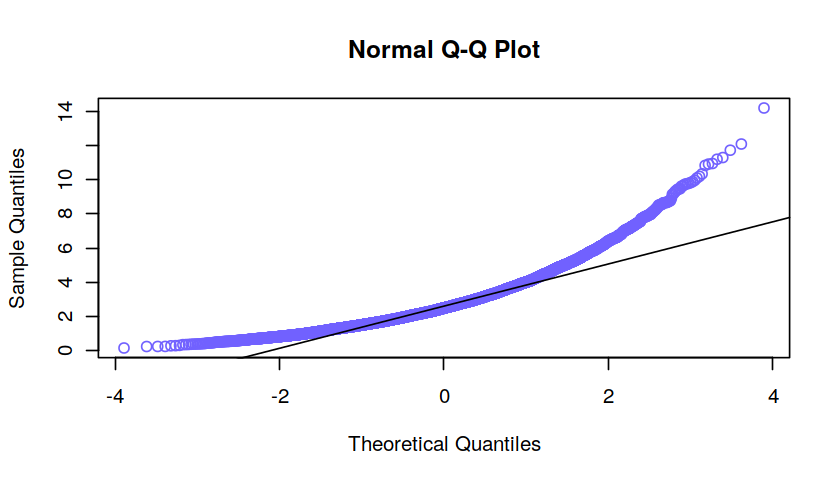

In [24]:
options(repr.plot.width=7, repr.plot.height=4)
qqnorm(L, col="#7161ff")
qqline(L)

<div style="text-align: justify">El patrón de la gráfica de distribución normal es no-lineal, lo cual sugiere que el tiempo de vida no sigue una distribución normal.</div>

#### <br /><div style="text-align: justify">f) Construya un histograma de los tiempos de vida del sistema.</div>

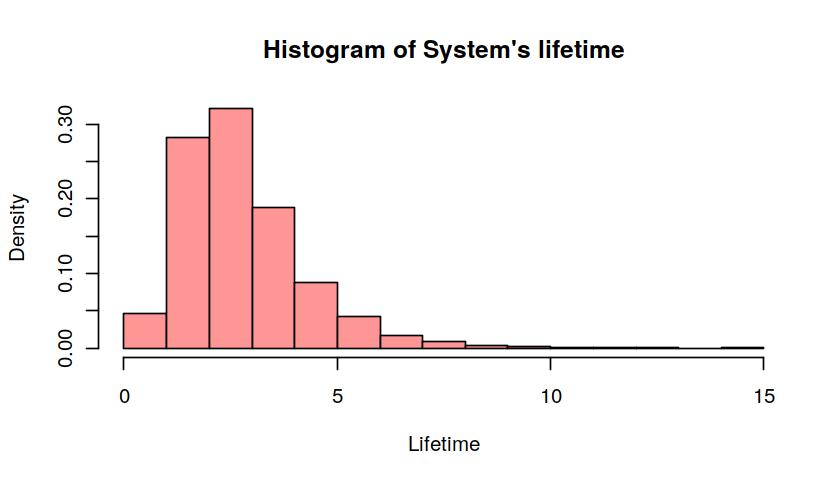

In [21]:
options(repr.plot.width=7, repr.plot.height=4)
hist(L, probability=T, main="Histogram of System's lifetime", xlab="Lifetime", col="#ff9696")

<div style="text-align: justify">El histograma del tiempo de vida muestra una asimetría positiva: la cola derecha es más larga y la masa de la distribución se concentra en la parte izquierda.</div>

***
<br></br>

### **Ejercicio 5**

#### <div style="text-align: justify">Se toma una muestra aleatoria de tamaño 8 de una distribución exponencial con parámetro $\lambda$ desconocido. Los valores de la muestra son: 2.74, 6.41, 4.96, 1.65, 6.38, 0.19, 0.52 y 8.38. Este ejercicio muestra cómo se emplea la estimación bootstrap para estimar el sesgo y la incertidumbre $\sigma_{\hat{\lambda}}$ en la estimación de $\hat{\lambda} = \frac{1}{\overline{X}}$.</div>

#### <br /><div style="text-align: justify">a) Calcule $\hat{\lambda} = \frac{1}{\overline{X}}$ para la muestra específica.</div>

In [9]:
x <- c(2.74, 6.41, 4.96, 1.65, 6.38, 0.19, 0.52, 8.38)
n <- length(x)
nboot <- 1000
lambda_sample <- 1 / mean(x)
display_markdown(paste("$\\hat{\\lambda} =$", lambda_sample))

$\hat{\lambda} =$ 0.256163944924752

#### <br /><div style="text-align: justify">b) Genere 1000 muestras de estimación bootstrap de tamaño 8 a partir de la distribución $Exp\left(\hat{\lambda}\right)$.</div>

In [10]:
y <- rexp(n*nboot, lambda_sample)
data <- matrix(y, ncol=n, byrow = T)

#### <br /><div style="text-align: justify">c) Calcule los valores ${\hat\lambda^*_i} = 1 / \overline{X}_i$ para cada una de las 1000 muestras bootstrap.</div>

In [11]:
lambda_boot <- n / rowSums(data)

#### <br /><div style="text-align: justify">d) Calcule la media muestral y la desviación estándar muestral de ${\hat\lambda^*_1},...,{\hat\lambda^*_{1000}}$.</div>

In [12]:
lambda_mean <- mean(lambda_boot)
display_markdown(paste("$\\overline{\\hat\\lambda^*} =$", lambda_mean))
lambda_sd <- sd(lambda_boot)
display_markdown(paste("$\\sigma^*_{\\hat\\lambda} =$", lambda_sd))

$\overline{\hat\lambda^*} =$ 0.292460848018654

$\sigma^*_{\hat\lambda} =$ 0.115142591829353

#### <br /><div style="text-align: justify">e) Estime el sesgo y la incertidumbre en $\hat\lambda$.</div>

In [31]:
bias <- lambda_mean - lambda_sample #sesgo del estimador
display_markdown(paste("$bias\\left(\\hat\\lambda\\right) =$", bias))
un <- sqrt(lambda_mean*(1 - lambda_mean) / n) #incertidumbre
display_markdown(paste("$\\sigma_{\\hat\\lambda} =$", un))

$bias\left(\hat\lambda\right) =$ 0.034126419085569

$\sigma_{\hat\lambda} =$ 0.160476582626982

***
<br></br>

### **Ejercicio 6**

#### <div style="text-align: justify">La fuerza compresiva cilíndrica (en MPa) fue medida para 11 vigas. Los resultados fueron:</div>

#### <div style="text-align: center">38.43, 38.43, 38.39, 38.83, 38.45, 38.35, 38.43, 38.31, 38.32, 38.48, 38.50</div>

#### <br /><div style="text-align: justify">a) ¿Es adecuado utilizar el estadístico Student para construir un intervalo de confianza de 95% para la media de la fuerza compresiva cilíndrica?</div><br />

<div style="text-align: justify">El estadístico Student se aplica cuando la población estudiada sigue una distribución normal, pero el tamaño muestral es demasiado pequeño como para que el estadístico en el que está basada la inferencia esté normalmente distribuido.
Para determinar si su utilización es adecuada, se realiza un gráfico Q-Q normal y se comprueba si la muestras obtenidas parecen provenir de una población con distribucón normal.</div>

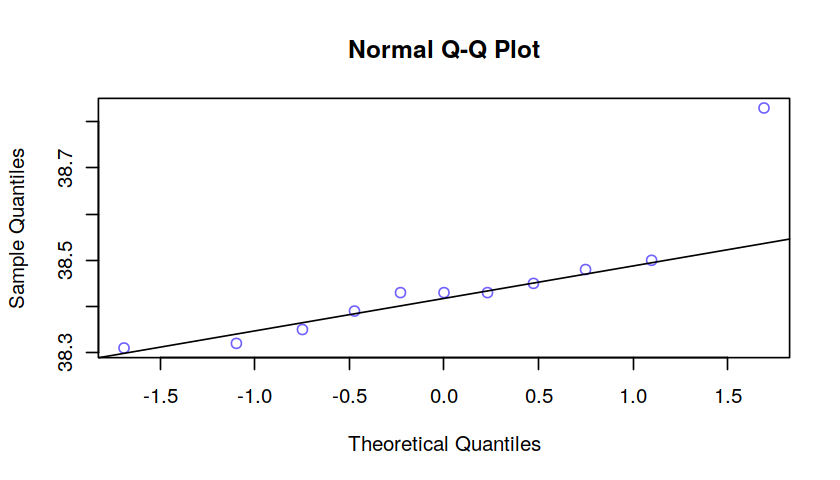

In [26]:
x <- c(38.43, 38.43, 38.39, 38.83, 38.45, 38.35, 38.43, 38.31, 38.32, 38.48, 38.50)

options(repr.plot.width=7, repr.plot.height=4)
qqnorm(x, col="#7161ff")
qqline(x)

<div style="text-align: justify">Observando el gráfico Q-Q se comprueba la no-normalidad de las muestras. Por lo tanto no es posible utilizar el estadístico Student para construir el intervalo de confianza.</div>

#### <br /><div style="text-align: justify">b) Genere 1000 muestras de estimación bootstrap de estos datos. Determine los percentiles 2.5% y 97.5%.</div>

In [9]:
x_mean <- mean(x)
n <- length(x)
nboot <- 1000
data <-matrix(sample(x, size = n * nboot, replace = T), nrow = nboot, byrow = T)

x_star_mean <- apply(data, 1, mean)
qnt <- quantile(x_star_mean , probs = c(0.025, 0.975))
display_markdown("Percentiles determinados a partir de 1000 muestras de estimación bootstrap:")
qnt

Percentiles determinados a partir de 1000 muestras de estimación bootstrap:

2.5%    97.5% 
38.38545 38.54727

#### <br /><div style="text-align: justify">c) Calcule un intervalo de confianza de estimación bootstrap de 95% para la media de la fuerza compresiva, usando el método 1.</div>

En el método 1, el intervalo de confianza de 95% es $\left(\overline{X}^*_{0.025}, \overline{X}^*_{0.975}\right)$.

In [10]:
display_markdown(paste("Intervalo de confianza de 95% con el método 1: (",
                       round(qnt[1], digits = 3), ", ", round(qnt[2], digits =3), ")",sep=""))

Intervalo de confianza de 95% con el método 1: (38.385, 38.547)

#### <br /><div style="text-align: justify">d) Calcule un intervalo de confianza de estimación bootstrap de 95% para la media de la fuerza compresiva, usando el método 2.</div>

<div style="text-align: justify">El método 2 utiliza la media X de la muestra original, además de los percentiles; con el método 2 el intervalo de confianza de 95% es $\left(2\overline{X}-\overline{X}^*_{0.975}, 2\overline{X}-\overline{X}^*_{0.025}\right)$.</div>

In [11]:
conf_interval <- 2*x_mean - qnt 
display_markdown(paste("Intervalo de confianza de 95% con el método 2: (",
                       round(conf_interval[2], digits = 3), ", ",
                       round(conf_interval[1], digits = 3), ")", sep=""))

Intervalo de confianza de 95% con el método 2: (38.347, 38.509)

***
<br></br>

### **Ejercicio 7**

#### <div style="text-align: justify">Una muestra de 7 bloques de concreto tenía su fuerza de compresión medida en MPa. Los resultados fueron:</div>

#### <div style="text-align: center">1367.6, 1411.5, 1318.7, 1193.6, 1406.2, 1425.7, 1572.4</div>

#### <br /><div style="text-align: justify">a) Genere 10000 muestras de estimación bootstrap de los datos.</div>

In [14]:
x <- c(1367.6,1411.5,1318.7,1193.6,1406.2,1425.7,1572.4)
n <- length(x)
x_mean <- mean(x)
nboot <- 10000
data <-matrix(sample(x, size = n * nboot, replace = T), nrow = nboot, byrow = T)

#### <br /><div style="text-align: justify">b) Calcule un intervalo de confianza de estimación bootstrap de 99% para la media de la fuerza compresiva, usando el método 1.</div>

In [15]:
x_star_mean <- apply(data, 1, mean)
qnt <- quantile(x_star_mean , probs = c(0.005, 0.995))
display_markdown(paste("Intervalo de confianza de 99% con el método 1: (",
                       round(qnt[1], digits = 3), ", ", round(qnt[2], digits =3), ")",sep=""))

Intervalo de confianza de 99% con el método 1: (1280.714, 1483.914)

#### <br /><div style="text-align: justify, width: 100%">c) Calcule un intervalo de confianza de estimación bootstrap de 99% para la media de la fuerza compresiva, usando el método 2.</div>

In [16]:
conf_interval <- 2*x_mean - qnt 
display_markdown(paste("Intervalo de confianza de 99% con el método 2: (",
                       round(conf_interval[2], digits = 3), ", ",
                       round(conf_interval[1], digits = 3), ")", sep=""))

Intervalo de confianza de 99% con el método 2: (1286.286, 1489.486)

***
<br></br>

### **Ejercicio 8**

#### <div style="text-align: justify">Con referencia al ejercicio $ 6 $, sea $\mu$ la media poblacional de la fuerza compresiva, en MPa. Considere las siguientes hipótesis nulas:</div>

#### <div style="text-align: center">$i) H_0: \mu=38.53$&emsp;$ii) H_0: \mu=38.35$&emsp;$iii) H_0: \mu=38.45$&emsp;$iv) H_0: \mu=38.55$</div>

#### <div style="text-align: justify">Genere 1000 muestras bootstrap.</div>

In [7]:
x <- c(38.43, 38.43, 38.39, 38.83, 38.45, 38.35, 38.43, 38.31, 38.32, 38.48, 38.50)
x_mean <- mean(x)
n <- length(x)
nboot<-1000
data <-matrix(sample(x, size = n * nboot, replace = T), nrow = nboot, byrow = T)

#### <div style="text-align: justify">a) Utilizando los datos bootstrap que usted generó, ¿cuál de estas hipótesis nulas se puede rechazar a un nivel de 5%, utilizando el método 1?</div>

In [8]:
x_star_mean <- apply(data, 1, mean)
qnt5 <- quantile(x_star_mean , probs = c(0.025, 0.975))
display_markdown(paste("Intervalo de confianza de 95% con el método 1: (",
                       round(qnt5[1], digits = 3), ", ", round(qnt5[2], digits =3), ")",sep=""))

Intervalo de confianza de 95% con el método 1: (38.382, 38.539)

<div style="text-align: justify">Se pueden rechazar las hipótesis que cuyo valor no este contenido en el intervalo:
    <ul>
        <li>$ii) H_0: \mu=38.35$</li>
        <li>$iv) H_0: \mu=38.55$</li>
    </ul>
</div>

#### <div style="text-align: justify">b) Utilizando los datos bootstrap que usted generó, ¿cuál de estas hipótesis nulas se puede rechazar a un nivel de 10%, utilizando el método 1?</div>

In [9]:
qnt10 <- quantile(x_star_mean , probs = c(0.05, 0.95))
display_markdown(paste("Intervalo de confianza de 90% con el método 1: (",
                       round(qnt10[1], digits = 3), ", ", round(qnt10[2], digits =3), ")",sep=""))

Intervalo de confianza de 90% con el método 1: (38.389, 38.521)

<div style="text-align: justify">Se pueden rechazar:
    <ul>
        <li> $i) H_0: \mu=38.53$</li>
        <li>$ii) H_0: \mu=38.35$</li>
        <li>$iv) H_0: \mu=38.55$</li>
    </ul>
</div>

#### <div style="text-align: justify">c) Si se realiza un experimento bootstrap dos veces con los mismos datos, ¿es necesario que los resultados concuerden?. Explique.</div><br />

<div style="text-align: justify">Los resultados de dos experimentos bootstrap no necesariamente coinciden debido a la característica aleatoria del muestreo.</div>

***
<br></br>

### **Ejercicio 9**

#### <div style="text-align: justify">Se sospecha que utilizar gasolina premium en lugar de regular aumentará el millaje para automóviles con un diseño de motor especial. Se usan 16 automóviles en un experimento aleatorio. De la misma manera se eligen 8 para probarlos con gasolina regular, mientras que los otros 8 se prueban con gasolina premium. Los resultados en mi/galón, son:</div>

|Tipo | mi/galón|
|---|---|
| Regular | &emsp; 29.1&emsp; 27.1&emsp; 30.8&emsp; 17.3&emsp; 27.6&emsp; 16.3&emsp; 28.4&emsp; 30.2 |
| Premium | &emsp; 28.3&emsp; 32.0&emsp; 27.4&emsp; 35.3&emsp; 29.9&emsp; 35.6&emsp; 30.9&emsp; 29.7 |

#### <div style="text-align: justify">a) Bajo la hipótesis nula de que cada automóvil obtendrá el mismo millaje con cualquier tipo de gasolina, ¿cuántos resultados diferentes son posibles para este experimento?</div><br />

<div style="text-align: justify">Existen dos resultados posibles: 
<ul>
    <li>No hay evidencias en contra de la hipótesis nula</li>
    <li>Hay evidencias en contra de la hipótesis nula, por lo que esta se rechaza en favor de la hipótesis alternativa</li>
</ul></div>

#### <div style="text-align: justify">b) Sean $\overline{R}$ y $\overline{P}$ las medias muestrales de los millajes de para los grupos de gasolina regular y premium respectivamente. Calcule $\overline{R}$ y $\overline{P}$ .</div>

In [27]:
R <- c(29.1,27.1,30.8,17.3,27.6,16.3,28.4,30.2) #Regular
P <- c(28.3,32.0,27.4,35.3,29.9,35.6,30.9,29.7) #Premium
R_mean <- mean(R)
P_mean <- mean(P)
display_markdown(paste("$\\overline{R} = $", R_mean))
display_markdown(paste("$\\overline{P} = $", P_mean))

$\overline{R} = $ 25.85

$\overline{P} = $ 31.1375

#### <div style="text-align: justify">c) Realice una prueba aleatoria para determinar si se puede concluir que la gasolina premium tiende a incrementar el millaje. Utilice el estadístico de prueba $\overline{P} - \overline{R}$ . Genere al menos 1000 resultados aleatorios y calcule el p-valor.</div>

<div style="text-align: center">$H_0: \mu_P - \mu_R = 0$&emsp;&emsp;$H_1: \mu_P - \mu_R > 0$</div>

In [24]:
x <- c(R, P)
s0 <- P_mean - R_mean #diferencia de medias
n <- length(x) / 2
nboot <- 1000
data <- array(sample(x, size = n*nboot*2, replace=T), dim = c(nboot,n,2)) # array de 3 dimensiones
P_star_mean <- apply(data[,,1], 1, mean)
R_star_mean <- apply(data[,,2], 1, mean)
mean_diff <- P_star_mean - R_star_mean
p_value <- length(mean_diff[mean_diff >= s0]) / length(mean_diff)
display_markdown(paste("$p$-$valor =$", p_value))

$p$-$valor =$ 0.011

<div style="text-align: justify">Utilizando un nivel de significancia $\alpha = 0.05$ se rechaza la hipótesis nula y se verifica que la media de millas/galón con gasolina premium es mayor que con gasolina regular. Sin embargo, cabe destacar que si se considera un nivel de significancia menor, por ejemplo $\alpha = 0.01$, no es posible rechazar la hipótesis nula.</div>

#### <div style="text-align: justify">d) Utilice la prueba Student para probar la hipótesis nula de que la media del millaje utilizando gasolina regular es mayor que o igual a la media del millaje utilizando gasolina premium. ¿Este resultado es confiable?. Explique.</div>

In [31]:
student <- t.test(
  x           = R,
  y           = P,
  alternative = "less",
  mu          = 0,
  conf.level  = 0.95
)
display_markdown(paste("$p$-$valor =$", student$p.value))

$p$-$valor =$ 0.0210104827638615

<div style="text-align: justify">La distribución t de Student se puede utilizar para calcular un intervalo de confianza para la diferencia entre las dos medias poblacionales solo si ambas poblaciones son normales.</div>

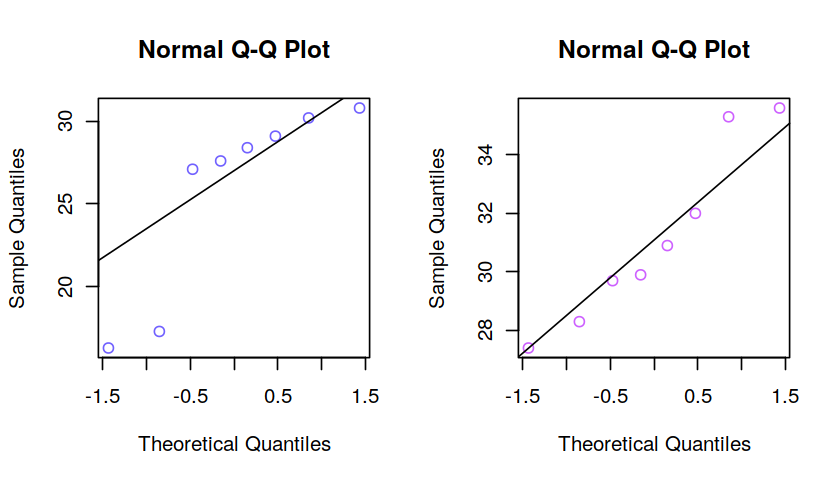

In [29]:
options(repr.plot.width=7, repr.plot.height=4)
par(mfcol = c(1, 2))
qqnorm(R, col="#7161ff")
qqline(R)
qqnorm(P, col="#cd61ff")
qqline(P)

<div style="text-align: justify">Los gráficos Q-Q sugieren que las muestras no provienen de poblaciones con distribución normal. Por lo tanto no es adecuado utilizar la prueba t de Student y los resultados obtenidos no son confiables.</div>

***
<br></br>

### **Ejercicio 10**

#### <div style="text-align: justify">Con referencia al ejercicio anterior, realice una prueba aleatoria para determinar si el millaje de gasolina regular tiene una varianza mayor que la varianza del millaje utilizando gasolina premium. Genere al menos 1000 resultados aleatorios.</div>

<div style="text-align: center">$H_0: \sigma^2_R - \sigma^2_P = 0$&emsp;&emsp;$H_1: \sigma^2_R - \sigma^2_P > 0$</div>

In [37]:
R <- c(29.1,27.1,30.8,17.3,27.6,16.3,28.4,30.2) #Regular
P <- c(28.3,32.0,27.4,35.3,29.9,35.6,30.9,29.7) #Premium
R_var <- sd(R)^2
P_var <- sd(P)^2
s0 <- R_var - P_var #diferencia de varianzas
n <- length(x) / 2
nboot <- 1000
x <- c(R, P)
data <- array(sample(x, size = n*nboot*2, replace=T), dim = c(nboot,n,2)) # array de 3 dimensiones
P_star_var <- apply(data[,,1], 1, sd)^2
R_star_var <- apply(data[,,2], 1, sd)^2
var_diff <- R_star_var - P_star_var
p_value <- length(var_diff[var_diff >= s0]) / length(var_diff)
display_markdown(paste("$p$-$valor =$", p_value))

$p$-$valor =$ 0.179

<div style="text-align: justify">No hay evidencia suficiente para rechazar la hipótesis nula.</div>

***
<br></br>

### **Ejercicio 11**

#### <div style="text-align: justify">Suponga que ha comprado una máquina de llenado para bolsas de dulces que contendrá 16oz de éstos. Una muestra aleatoria de 10 bolsas produce los siguientes datos (en oz)</div>

#### <div style="text-align: center">15.87&emsp; 16.02&emsp; 15.08&emsp; 14.03&emsp; 15.69&emsp; 15.81&emsp; 16.04&emsp; 15.81&emsp; 15.92&emsp; 16.10</div>

#### <div style="text-align: justify">Con base en estos datos, ¿puede concluir que la media del peso de llenado es en realidad menor que 16 oz? Realice un test de hipótesis con bootstrap.</div>

<div style="text-align: center">$H_0: \mu = 16$&emsp;&emsp;$H_1: \mu < 16$</div>

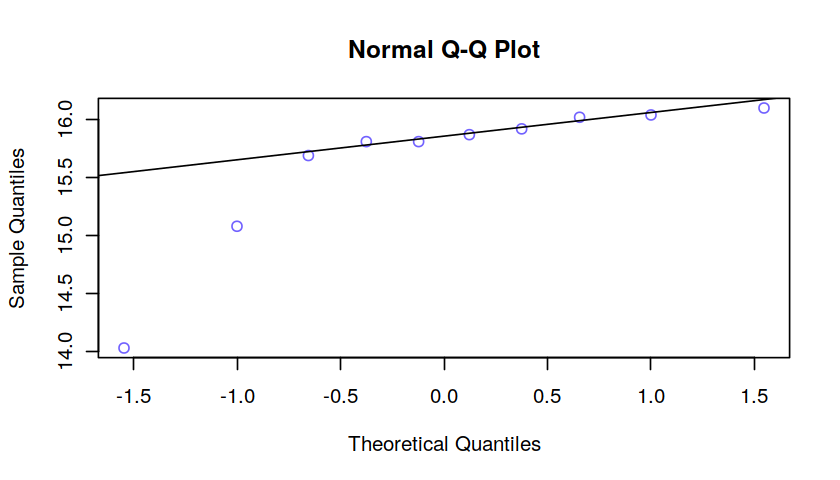

In [30]:
x <- c(15.87, 16.02, 15.08, 14.03, 15.69, 15.81, 16.04, 15.81, 15.92, 16.10)

options(repr.plot.width=7, repr.plot.height=4)
qqnorm(x, col="#7161ff")
qqline(x)

<div style="text-align: justify">Como el gráfico Q-Q sugiere que las muestras no provienen de poblaciones con distribución normal, no es adecuado utilizar la prueba t de Student para construir un intervalo de confianza para la media poblacional.</div>

<div style="text-align: justify">Por lo tanto, se utiliza estimación bootstrap para hallar un intervalo de confianza de $ 95\%$ y se comprueba si el valor $\mu = 16$ se encuentra dentro de dicho intervalo.</div>

In [65]:
nboot <- 10000
n <- length(x)
data <- matrix(sample(x, size = n * nboot, replace = T), nrow = nboot, byrow = T)
x_star_mean <- apply(data, 1, mean)
qnt <- quantile(x_star_mean, probs = c(2.5, 97.5)/100) # 15.2 - 15.9 menor que 16
display_markdown(paste("Intervalo de confianza de 95% con el método 1: (",
                       round(qnt[1], digits = 3), ", ", round(qnt[2], digits =3), ")",sep=""))
x_mean <- mean(x)
conf_interval_2 <- 2*x_mean - qnt 
display_markdown(paste("Intervalo de confianza de 95% con el método 2: (",
                       round(conf_interval_2[2], digits = 3), ", ",
                       round(conf_interval_2[1], digits = 3), ")", sep=""))



Intervalo de confianza de 95% con el método 1: (15.209, 15.938)

Intervalo de confianza de 95% con el método 2: (15.336, 16.065)

<div style="text-align: justify">
    Las conclusiones del experimento difieren dependiendo del método utilizado para construir el intervalo de confianza:
    <ul>
        <li>Con el método 1, se rechaza la hipótesis nula y se acepta la hipótesis alternativa de que la media es en realidad menor que $ 16$.</li>
        <li>Con el método 2, el intervalo de confianza contiene al valor de la hipótesis nula y por lo tanto no hay evidencia suficiente para rechazarla.</li>
    </ul>
</div>

***
<br></br>

### **Ejercicio 12**

#### <div style="text-align: justify">Dos máquinas se utilizan para empacar detergente de lavandería. Cuatro cajas de cada máquina tienen sus contenidos cuidadosamente pesados, con los siguientes resultados en gramos</div>

|Máquina | contenido [gramos]|
|---|---|
| Máquina 1 | &emsp; 1702&emsp; 1727&emsp; 1751&emsp; 1754 |
| Máquina 2 | &emsp; 1706&emsp; 1720&emsp; 1752&emsp; 1746 |

#### <div style="text-align: justify">Un ingeniero desea probar la hipótesis nula de que las medias de los pesos de las cajas de las dos máquinas son iguales.</div>

<div style="text-align: center">$H_0: \mu_1 - \mu_2 = 0$&emsp;&emsp;$H_1: \mu_1 - \mu_2 \neq 0$</div>

#### <div style="text-align: justify">a) Realice un test de hipótesis utilizando el procedimiento A.</div>

In [31]:
m1 <- c(1702, 1727, 1751, 1754)
m2 <- c(1706, 1720, 1752, 1746)

nboot <- 1000

n1 <- length(m1) 
data1 <-matrix(sample(m1, size = n1 * nboot, replace = T), nrow = nboot, byrow = T)
m1_mean <- apply(data1, 1, mean)
n2 <- length(m2)
data2 <-matrix(sample(m2, size = n2 * nboot, replace = T), nrow = nboot, byrow = T)
m2_mean <- apply(data2, 1, mean)
diff_mean <- m1_mean - m2_mean
qnt <- quantile(diff_mean, probs = c(0.025, 0.975))
display_markdown(paste("Intervalo de confianza de 95% con el procedimiento A: (",
                       round(qnt[1], digits = 3), ", ", round(qnt[2], digits =3), ")",sep=""))

Intervalo de confianza de 95% con el procedimiento A: (-26.25, 29.5)

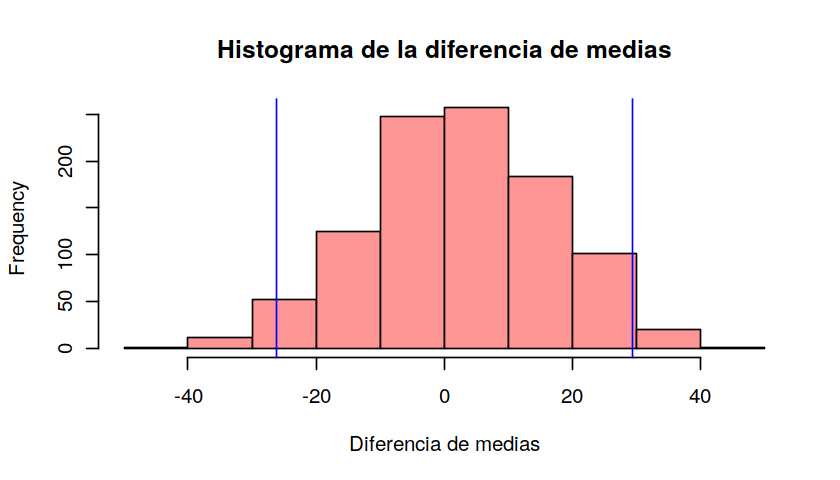

In [32]:
options(repr.plot.width=7, repr.plot.height=4)
hist(diff_mean, main = paste("Histograma de" , "la diferencia de medias"), xlab="Diferencia de medias", col="#ff9696")
abline ( v = qnt, col='blue')

<div style="text-align: justify">Como el intervalo de confianza contiene al valor 0 (ambas medias son iguales), no hay evidencia para rechazar la hipótesis $H_0$.</div>

#### <div style="text-align: justify">b) Realice un test de hipótesis utilizando el procedimiento B.</div>

In [37]:
m1 <- c(1702, 1727, 1751, 1754)
m2 <- c(1706, 1720, 1752, 1746)

n1 <- length(m1) 
m1_mean <- mean(m1)
m1_var <- var(m1)

n2 <- length(m2)
m2_mean <- mean(m2)
m2_var <- var(m2)

s0 <- (m1_mean - m2_mean) / sqrt(m1_var/n1 + m2_var/n2)

x <- c(m1, m2) 
mu <- mean(x)

m1_t <- m1 - m1_mean + mu
m2_t <- m2 - m2_mean + mu

nboot <- 1000

In [38]:
data1 <-matrix(sample(m1_t, size = n1 * nboot, replace = T), nrow = nboot, byrow = T)
m1_star_mean <- apply(data1, 1, mean)
m1_star_sd <- apply(data1, 1, sd)

data2 <-matrix(sample(m2_t, size = n2 * nboot, replace = T), nrow = nboot, byrow = T)
m2_star_mean <- apply(data2, 1, mean)
m2_star_sd <- apply(data2, 1, sd)

t_boot <-(m1_star_mean - m2_star_mean) / sqrt((m1_star_sd^2)/n1 + (m2_star_sd^2)/n2)

# hipotesis bilateral
ASL_t <- length(t_boot[abs(t_boot) >= abs(s0)])/nboot
display_markdown(sprintf("$$P\\left(-s_0 < \\frac{\\overline{X^*_1} - \\overline{X^*_2}}
{\\sqrt{\\frac{S^*_1}{n_1} + \\frac{S^*_2}{n_2}}} < s_0\\right) = %.3f$$", ASL_t))

$$P\left(-s_0 < \frac{\overline{X^*_1} - \overline{X^*_2}}
{\sqrt{\frac{S^*_1}{n_1} + \frac{S^*_2}{n_2}}} < s_0\right) = 0.890$$

Considerando un nivel de significancia $\alpha = 0.05$, no hay evidencia para rechazar $H_0$.

<br></br>
***
<br></br>